**Рынок заведений общественного питания Москвы**  

**Загрузить данные и подготовить их к анализу**  

Загрузить данные о заведениях общественного питания Москвы. Убедиться, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.  

**Путь к файлу:** /datasets/rest_data.csv

**Анализ данных**
* Исследовать соотношение видов объектов общественного питания по количеству. Построить график.
* Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.
* Для какого вида объекта общественного питания характерно сетевое распространение?
* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.
* Выделить в отдельный столбец информацию об улице из столбца address .
* Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
* Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
* Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
* Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.

**Подготовка презентации**  

Подготовить презентацию исследования для инвесторов. Для создания презентации использовать любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложить ссылку на презентацию в markdown-ячейке в формате:  

**Презентация:** <ссылка на облачное хранилище с презентацией>

**Описание данных**  

**Таблица rest_data:*  

**id** — идентификатор объекта;  
**object_name** — название объекта общественного питания;  
**chain** — сетевой ресторан;  
**object_type** — тип объекта общественного питания;  
**address** — адрес;  
**number** — количество посадочных мест.  

# Загрузить данные и подготовить их к анализу

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

In [3]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 100
sns.set(rc={'figure.figsize':(20, 10)})

In [4]:
rest = pd.read_csv('/datasets/rest_data.csv')
rest.name = 'rest'

In [5]:
# функция выводящая общую информацию по каждому файлу
def general_info(df):
        print('-' * 100, '\n')
        print(df.name)
        df.columns = map(str.lower, df.columns)
        display(df.info())
        display(df.describe().T)
        
        # данный блок исправляет ошибку, которая не позволяет выводит количество строк больше,
        # чем количество строк в самом дата фрейме
        if df.shape[0] > 10:
            display(df.sample(10))
        else:
            display(df.sample(df.shape[0]))

        
general_info(rest)

---------------------------------------------------------------------------------------------------- 

rest
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,"15,366.00","119,720.07","73,036.13",838.00,"28,524.00","144,974.50","184,262.25","223,439.00"
number,"15,366.00",59.55,74.74,0.00,12.00,40.00,80.00,"1,700.00"


,id,object_name,chain,object_type,address,number
11348,175081,Столовая Росстройэкспо,нет,столовая,"город Москва, Фрунзенская набережная, дом 30, строение 19",30
3191,29532,СТОЛОВАЯ-РАЗДАТОЧНАЯ ПРИ ШК. 307,нет,буфет,"город Москва, проезд Шокальского, дом 11, корпус 2",80
12587,204763,Столовая при банковской школе,нет,столовая,"город Москва, Сигнальный проезд, дом 23А",96
8313,157401,Патиссон,нет,кафе,"город Москва, Нижний Кисловский переулок, дом 7, строение 1",20
10213,172634,АВ-Дейли Азбука Вкуса,да,кафетерий,"город Москва, Садовая-Триумфальная улица, дом 18-20",20
8478,147109,Неспрессо,нет,кафетерий,"город Москва, Пресненская набережная, дом 2",0
14302,217152,Лёд N ROLL,нет,предприятие быстрого обслуживания,"город Москва, Новоясеневский проспект, дом 1",4
6646,20034,ШОКОЛАДНИЦА,да,кафе,"город Москва, улица Барклая, дом 10А",80
4066,26584,Ресторан «37.37»,нет,ресторан,"город Москва, Кантемировская улица, дом 14",100
8672,124636,Хачапури Молодежная,нет,кафе,"город Москва, Ярцевская улица, дом 19",100


In [6]:
# приводим к нижнему регистру наимеование заведений и адреса
rest['object_name'] = rest['object_name'].str.lower()
rest['address'] = rest['address'].str.lower()

In [7]:
# проверяем дубликаты
rest.duplicated().sum()

0

In [8]:
# меяем да и нет на True и False (с булевым типом даных можно производить математические расчеты)
rest['chain'] = rest['chain'].map({'да': True, 'нет':False})
rest['object_type'] = rest['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')

In [9]:
# посчитаем количество заведений без посадочных мест
print('Количество заведений без почадочых мест:', rest[rest['number'] == 0]['number'].count())
print('Доля заведений без почадочых мест:', rest[rest['number'] == 0]['number'].count() / rest.shape[0] * 100)
display(rest[rest['number'] == 0])
print(rest[rest['number'] == 0]['object_name'].unique())

Количество заведений без почадочых мест: 1621
Доля заведений без почадочых мест: 10.549264610178316


,id,object_name,chain,object_type,address,number
137,115498,пекарня & донер,False,закусочная,"город москва, бутырская улица, дом 9, корпус 2",0
154,152556,шаурма в пите,False,фаст-фуд,"город москва, варшавское шоссе, дом 72, корпус 2",0
157,149568,суши,False,фаст-фуд,"город москва, улица маршала василевского, дом 3, корпус 1",0
190,126956,"шаурма, куры-гриль",False,фаст-фуд,"город москва, 1-я владимирская улица, дом 21",0
195,149531,"шаурма, куры-гриль",False,фаст-фуд,"город москва, 2-я владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,милти,True,магазин (отдел кулинарии),"город москва, дубравная улица, дом 34/29",0
15335,211221,милти,True,магазин (отдел кулинарии),"город москва, пятницкое шоссе, дом 3",0
15336,211209,готовые блюда милти,True,фаст-фуд,"город москва, ореховый бульвар, дом 22а",0
15337,208477,милти,True,фаст-фуд,"город москва, 3-й крутицкий переулок, дом 18",0


['пекарня & донер' 'шаурма в пите' 'суши' 'шаурма, куры-гриль'
 'шаурма, выпечка' 'гбоу школа №1468' 'суши-шоп' 'пекарня' 'бистро'
 'кофе с собой' 'выпечка, кофейня' 'пицца помодоро' 'донеретт'
 'донер кебаб' 'суши сет' 'чебуреки' 'кофейня «кофе хаус»' 'шаурма'
 'донер-кебаб' 'босс-кулинария' 'магазин-кулинария' 'кофе энигма'
 'пицца «pizza pomodoro»' 'вкус востока' 'кофейня fresh bar' 'стардогs'
 'тандыр кебаб' 'французская пекарня' 'интермедсервис' 'сити пицца'
 'пирожки' 'суши wok' 'шаурма24' 'кофемаркет' 'доноретта'
 'выпечка, шаурма' 'добрынинский' 'кулинария мясная' 'кулинария.салаты'
 'кафетерий' 'кондитерская' '«ип» шацкая е.м' 'фрэш суши' 'бар «попкорн»'
 'мини-пекарня' 'макдоналдс' 'буфет при фгбоу во мглу' 'вкусный выбор'
 'премьер пицца' 'пищеблок ( закрытое)' 'one bucks coffee'
 '«ип» мураховский и.ф' 'предприятие быстрого обслуживания «русъпай»'
 'японский пес' 'пицца «паоло»' 'быстрое питание' 'кафе «бистро»'
 'кафе-бистро' 'самса хаус' 'правда кофе' 'донерок' '«ип» руше

**Вывод:**  

Проверена общая информация по df.  
Столбцы с именами заведений и адресами были приведены к нижнему регистру.  
В столбце chain Да и Нет, заменены на True и False (это необходимо, что бы иметь возможность производить мат. вычисления с данными столбца).  
Дубликаты не выявлены.  
Выявлены заведения с 0 количеством посадочных мест. Судя по данным, заведения относятся к "уличному питаню" и как правило у них нет посадочных мест, так же есть вероятность, что данные не были указаны.

# Анализ данных

## Исследовать соотношение видов объектов общественного питания по количеству. Построить график.

In [10]:
# Создаем график
def create_graph(data, **kwargs):
    
    sns.set_style("dark")
    sns.despine(left=True, bottom=True) 
    sns.set_context("paper", font_scale=2)
    
    # строим график barplot
    if kwargs['type_graph'] == 'barplot':
        # выводим значения
        for index, row in data.iterrows():
            sns.barplot(x=kwargs['x'], y=kwargs['y'], data=data, dodge=kwargs['dodge'], hue=kwargs['hue'])\
            .text(row.name, row[kwargs['y']]+kwargs['bias_y'], round(row[kwargs['y']],2), color='black', ha="center")
        
        plt.ylabel(kwargs['ylabel'], size=20)
    
    # строим график histplot
    elif kwargs['type_graph'] == 'histplot':
        sns.histplot(x=kwargs['x'], data=data, bins=kwargs['bins'], hue=kwargs['hue'], multiple=kwargs['multiple'])
    
    # строим график displot
    elif kwargs['type_graph'] == 'displot':
        sns.displot(data, bins=100, x=kwargs['x'], height=10, aspect=2, kde=True)
    
    # строим график boxplot
    elif kwargs['type_graph'] == 'boxplot':
        sns.boxplot(x=kwargs['x'], y=kwargs['y'], hue=kwargs['hue'], data=data)
        plt.ylabel(kwargs['ylabel'], size=20)
    
    plt.title(kwargs['title'], size=20)
    plt.xlabel(kwargs['xlabel'], size=20)
    plt.xticks(rotation=-30)
    
    if kwargs['legend']:
        plt.legend()


In [11]:
# формируем df видов объектов и их количество
ratio_types_catering_by_number = rest.groupby('object_type', as_index=False)\
.agg({'number':'count'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

print(ratio_types_catering_by_number)

                 object_type  number
0  магазин (отдел кулинарии)     273
1                 закусочная     360
2                  кафетерий     398
3                      буфет     585
4                        бар     856
5                   фаст-фуд    1923
6                   ресторан    2285
7                   столовая    2587
8                       кафе    6099


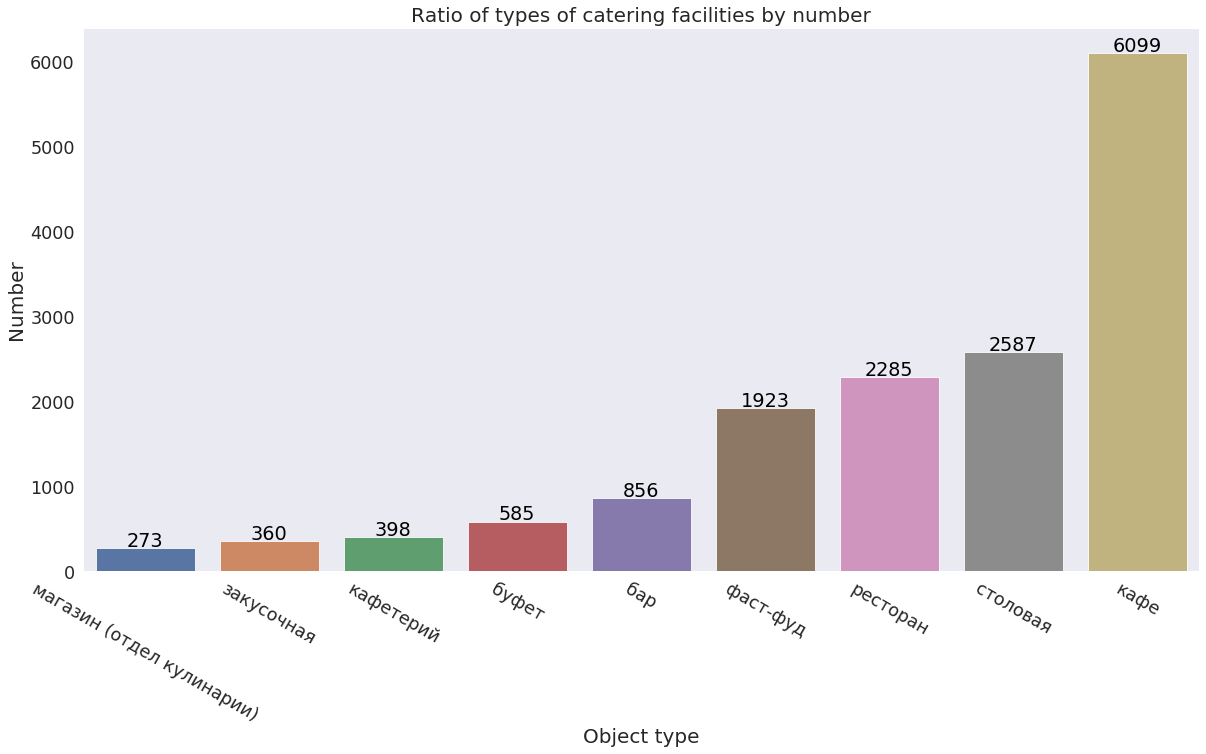

In [12]:
# строим график
create_graph(ratio_types_catering_by_number,
             type_graph='barplot',
             x='object_type',
             y='number',
             title='Ratio of types of catering facilities by number',
             xlabel='Object type',
             ylabel='Number',
             legend=False,
             dodge=True,
             hue=None,
             bias_y = 20
            )

**Вывод:**  

В топах кафе (очень сильный отрыв от остальных типов заведений), столовая, ресторан, фаст-фуд. Количество топ-4 типов заведений значително выше остальных типов.

## Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график.

In [13]:
# формируем df с соотношением сетевых и не сетевых заведений по количеству
ratio_establishments_by_number = rest['chain'].value_counts().to_frame().reset_index()
ratio_establishments_by_number.columns = ['chain', 'count']

print('Сетевых заведений {}, соотношение к общему количеству заведений {:.2%}'
      .format(ratio_establishments_by_number.query('chain == True')['count'][1],
              ratio_establishments_by_number.query('chain == True')['count'][1] /
              rest['chain'].count()))

print('Не сетевых заведений {}, соотношение к общему количеству заведений {:.2%}'
      .format(ratio_establishments_by_number.query('chain == False')['count'][0],
              ratio_establishments_by_number.query('chain == False')['count'][0] /
              rest['chain'].count()))

print('Не сетевых заведений в {:.2f} раз больше, чем сетевых'
      .format(ratio_establishments_by_number.query('chain == False')['count'][0] /
              ratio_establishments_by_number.query('chain == True')['count'][1]))

Сетевых заведений 2968, соотношение к общему количеству заведений 19.32%
Не сетевых заведений 12398, соотношение к общему количеству заведений 80.68%
Не сетевых заведений в 4.18 раз больше, чем сетевых


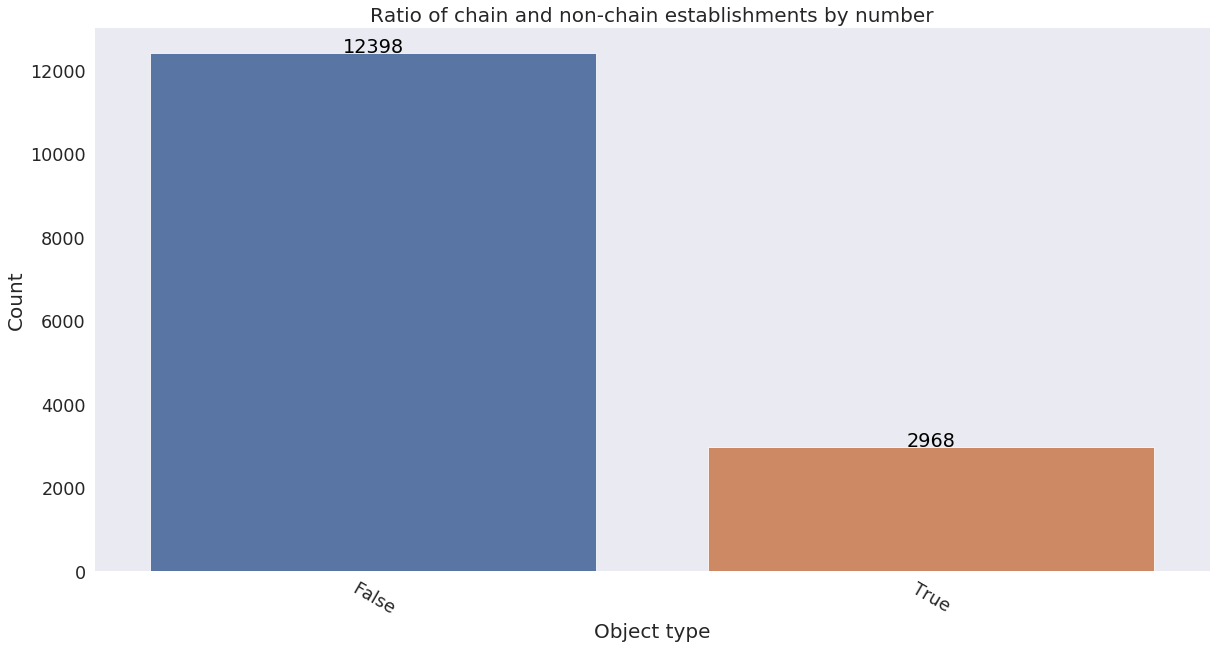

In [14]:
# строим график
create_graph(ratio_establishments_by_number,
             type_graph='barplot',
             x='chain',
             y='count',
             title='Ratio of chain and non-chain establishments by number',
             xlabel='Object type',
             ylabel='Count',
             legend=False,
             dodge=True,
             hue=None,
             bias_y = 20
            )

**Вывод:**  

Не сетевых заведений в 4.18 раз больше, чем сетевых

## Для какого вида объекта общественного питания характерно сетевое распространение?

In [15]:
# формируем df с видами общественного питания по количеству сетевых и не сетевых заведений
object_type_chain_non_chain = pd.pivot_table(rest,
                                             index='object_type',
                                             columns='chain',
                                             values='id',
                                             aggfunc='count'
                                            ).reset_index()

# создаем колонку с общим количеством заведений каждого типа
object_type_chain_non_chain['total'] = object_type_chain_non_chain[False] + object_type_chain_non_chain[True]

# получаем долю не сетевых заведений от общего количества
object_type_chain_non_chain['percent_non_chain'] = object_type_chain_non_chain[False] / object_type_chain_non_chain['total'] * 100

# получаем долю сетевых заведений от общего количества
object_type_chain_non_chain['percent_chain'] = object_type_chain_non_chain[True] / object_type_chain_non_chain['total'] * 100

# переименовываем столбцы
object_type_chain_non_chain.columns = ['object_type', 'non_chain', 'chain', 'total', 'percent_non_chain', 'percent_chain']

# сортируем df по столбцу chain
object_type_chain_non_chain = object_type_chain_non_chain.sort_values(by='chain')

# пересчитываем index (необходимо для корректных подписей на графике)
object_type_chain_non_chain = object_type_chain_non_chain.reset_index(inplace = False, drop = True)

display(object_type_chain_non_chain)

,object_type,non_chain,chain,total,percent_non_chain,percent_chain
0,столовая,2584,3,2587,99.88,0.12
1,буфет,574,11,585,98.12,1.88
2,бар,819,37,856,95.68,4.32
3,кафетерий,346,52,398,86.93,13.07
4,закусочная,304,56,360,84.44,15.56
5,магазин (отдел кулинарии),195,78,273,71.43,28.57
6,ресторан,1741,544,2285,76.19,23.81
7,фаст-фуд,1132,791,1923,58.87,41.13
8,кафе,4703,1396,6099,77.11,22.89


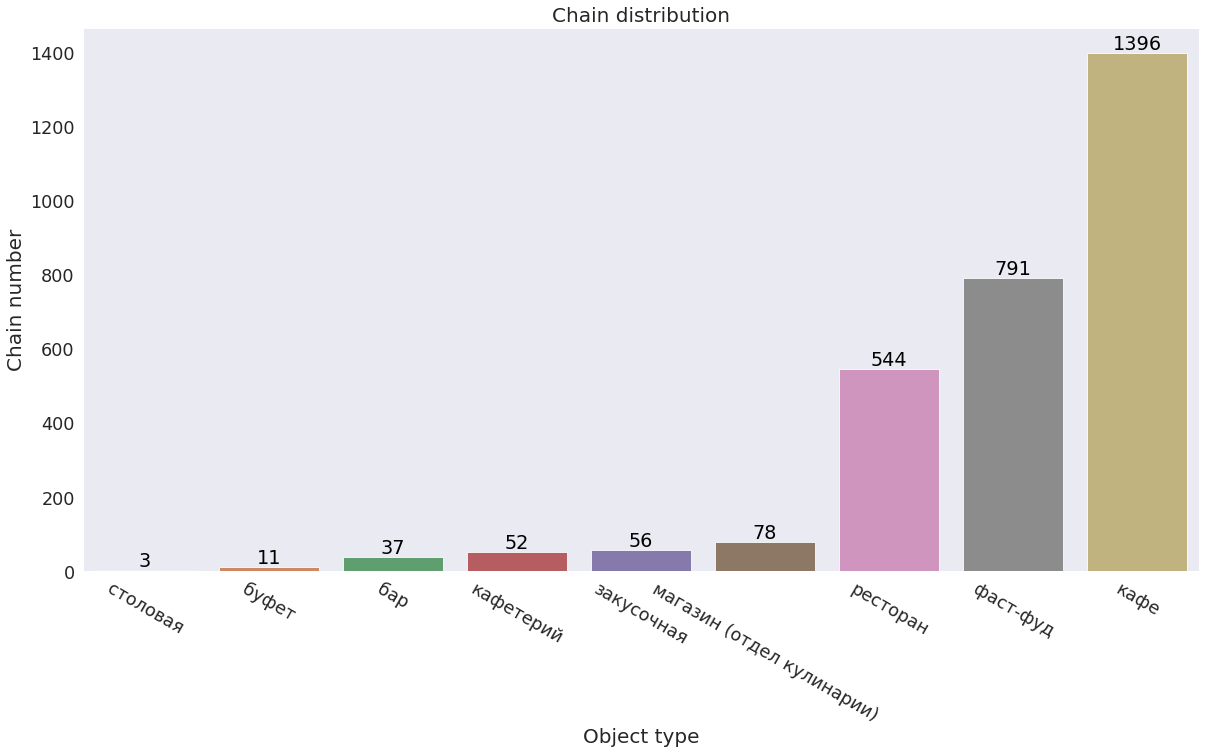

In [16]:
# строим график
create_graph(object_type_chain_non_chain,
             type_graph='barplot',
             x='object_type',
             y='chain',
             title='Chain distribution',
             xlabel='Object type',
             ylabel='Chain number',
             legend=False,
             dodge=False,
             hue=None,
             bias_y = 10
            )

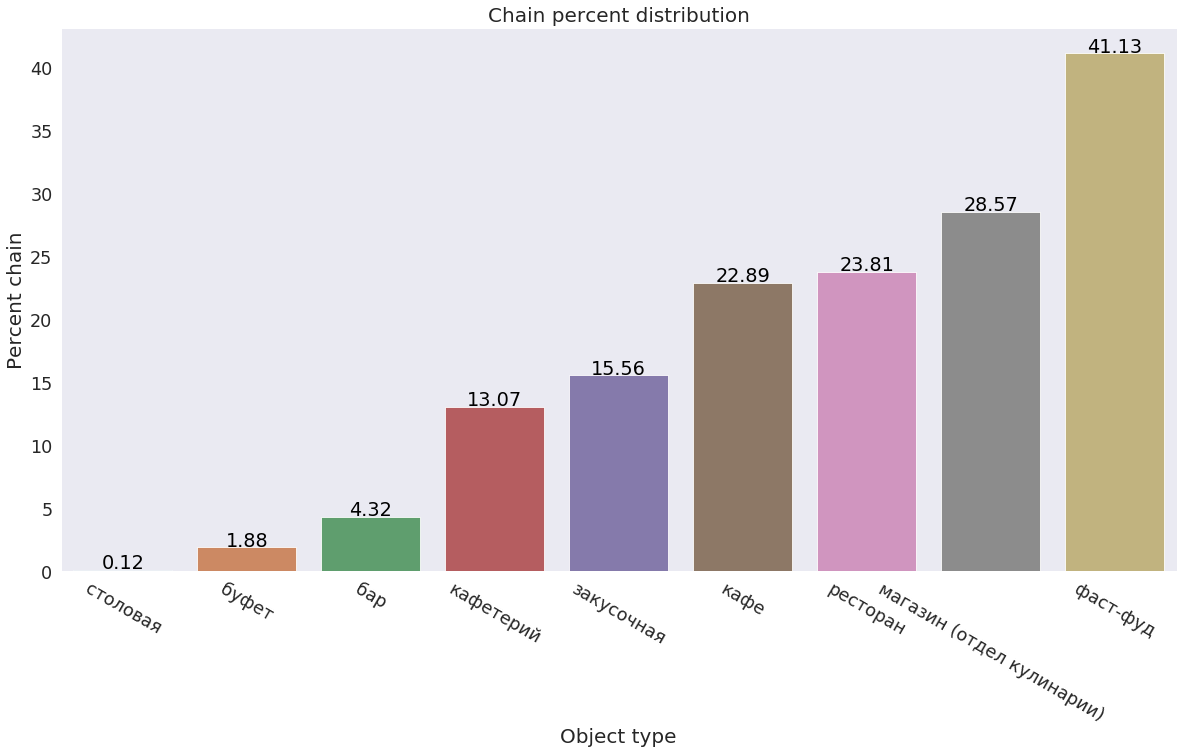

In [17]:
# сортируем df по столбцу percent_chain
object_type_chain_non_chain = object_type_chain_non_chain.sort_values(by='percent_chain')

# пересчитываем index (необходимо для корректных подписей на графике)
object_type_chain_non_chain = object_type_chain_non_chain.reset_index(inplace = False, drop = True)

# строим график
create_graph(object_type_chain_non_chain,
             type_graph='barplot',
             x='object_type',
             y='percent_chain',
             title='Chain percent distribution',
             xlabel='Object type',
             ylabel='Percent chain',
             legend=False,
             dodge=False,
             hue=None,
             bias_y = .1
            )

**Вывод:**  

Из графика Chain distribution мы наблюдаем тройку лидеров среди Сетевых заведений: кафе, фаст-фуд, ресторан, но из графика Chain percent distribution мы наблюдаем, что свойственно быть сетевым заведением в первую очередь фаст-фуду и далее: магазин (отдел кулинария), ресторан / кафе.

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [18]:
# убираем 0 значения и формируем df с количеством посадочных мест на заведение
rest_average_seats = rest[rest['number'] > 0]\
.groupby(['object_name', 'chain']).agg({'id':'count', 'number':'mean'}).reset_index()

rest_average_seats['number'] = rest_average_seats['number'].round(0).astype('int')

rest_average_seats

,object_name,chain,id,number
0,1-й мок,False,1,100
1,1-ый московский кадетский корпус,False,1,260
2,100 личная столовая,False,1,30
3,100 личное кафе,False,1,45
4,1001 ночь,False,1,70
...,...,...,...,...
9307,ясамарканд24,False,1,120
9308,ясмин,False,2,32
9309,ясон,False,2,85
9310,яуза,False,1,100


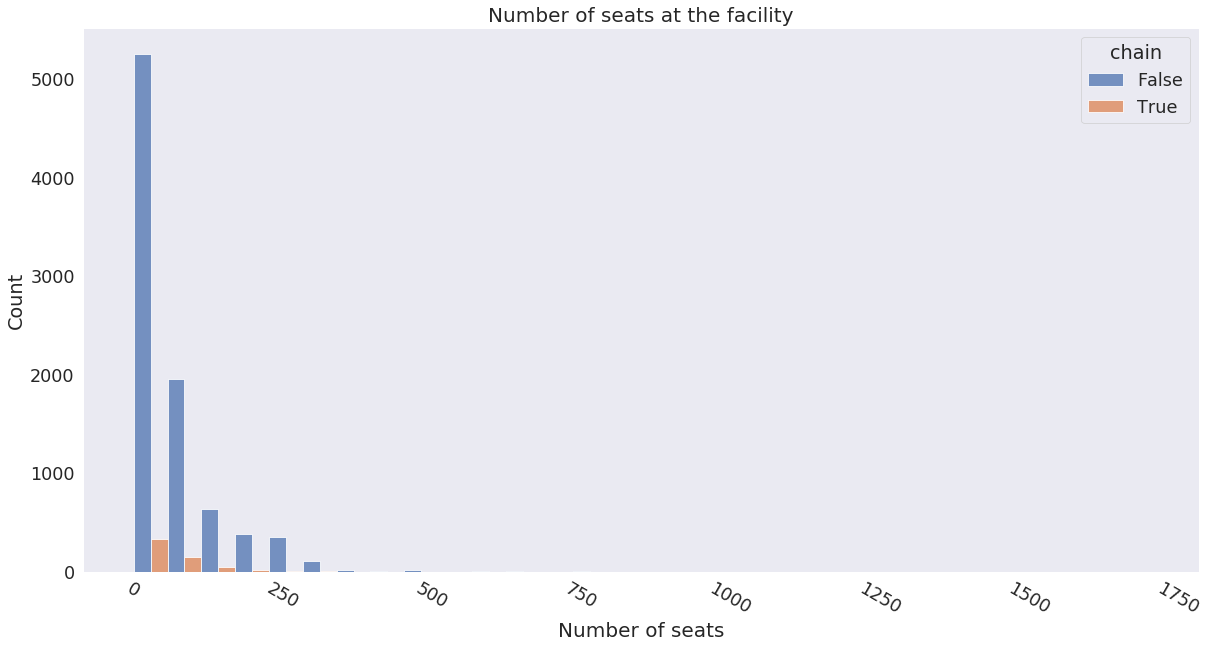

In [19]:
# строим график
create_graph(rest_average_seats,
             type_graph='histplot',
             x='number',
             title='Number of seats at the facility',
             xlabel='Number of seats',
             legend=False,
             hue='chain',
             bins=30,
             multiple="dodge"
            )

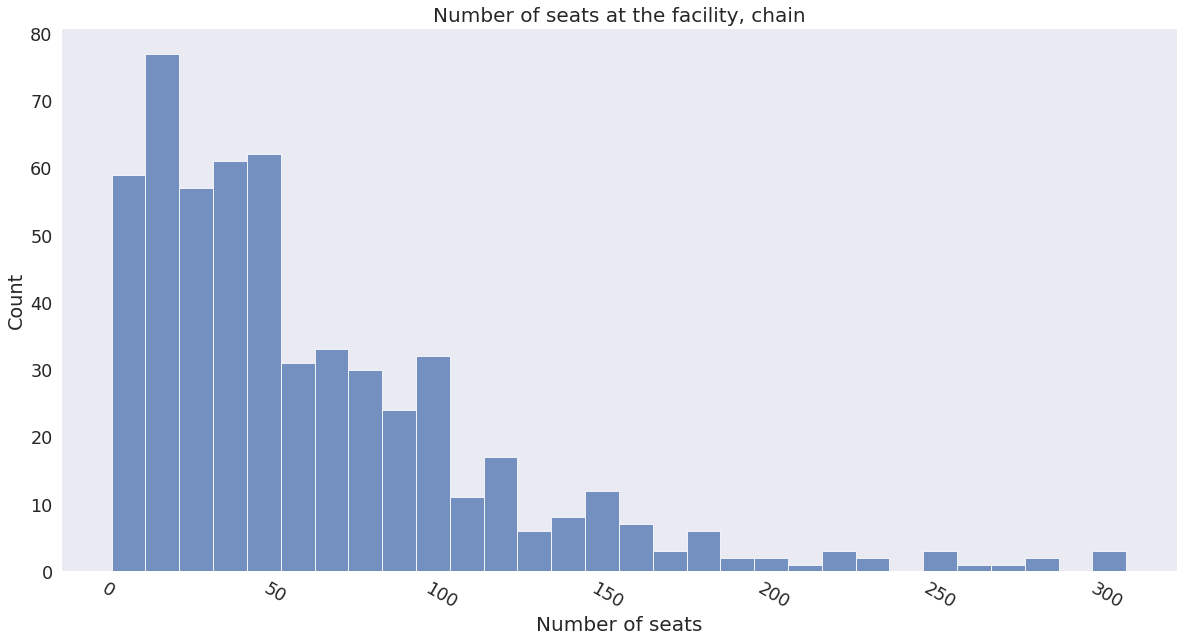

In [20]:
rest_average_seats_chain = rest_average_seats[rest_average_seats['chain'] == True]

# строим график
create_graph(rest_average_seats_chain,
             type_graph='histplot',
             x='number',
             title='Number of seats at the facility, chain',
             xlabel='Number of seats',
             legend=False,
             hue=None,
             bins=30,
             multiple="dodge"
            )

**Вывод:**  

* Для сетевых заведений характерно иметь до 50 посадочных мест  
* Выше сказаное характерно и для не сетевых заведений

## Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построить графики.

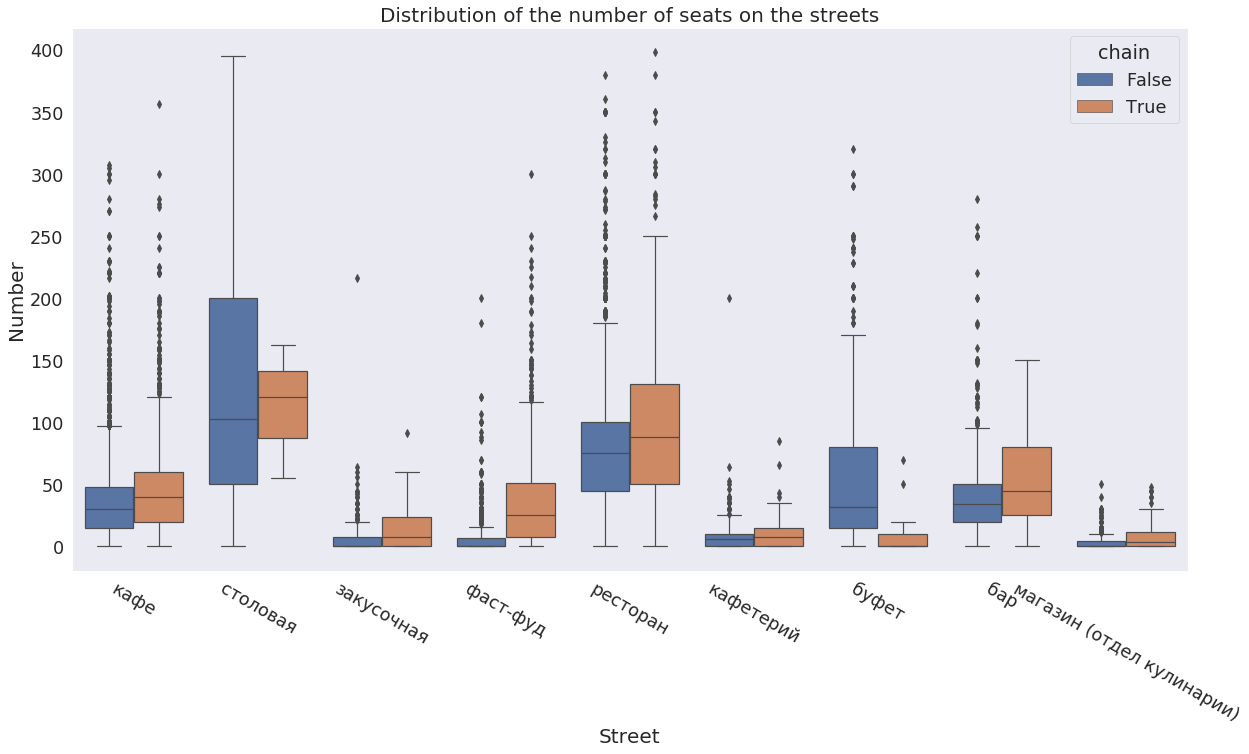

In [21]:
# строим график
create_graph(rest[rest['number'] < 400],
             type_graph='boxplot',
             x='object_type',
             y='number',
             title='Distribution of the number of seats on the streets',
             xlabel='Street',
             ylabel='Number',
             legend=False,
             dodge=False,
             hue='chain'
            )

                 object_type  number
0                 закусочная       0
1  магазин (отдел кулинарии)       0
2                   фаст-фуд       5
3                  кафетерий       6
4                       кафе      30
5                      буфет      32
6                        бар      35
7                   ресторан      80
8                   столовая     103


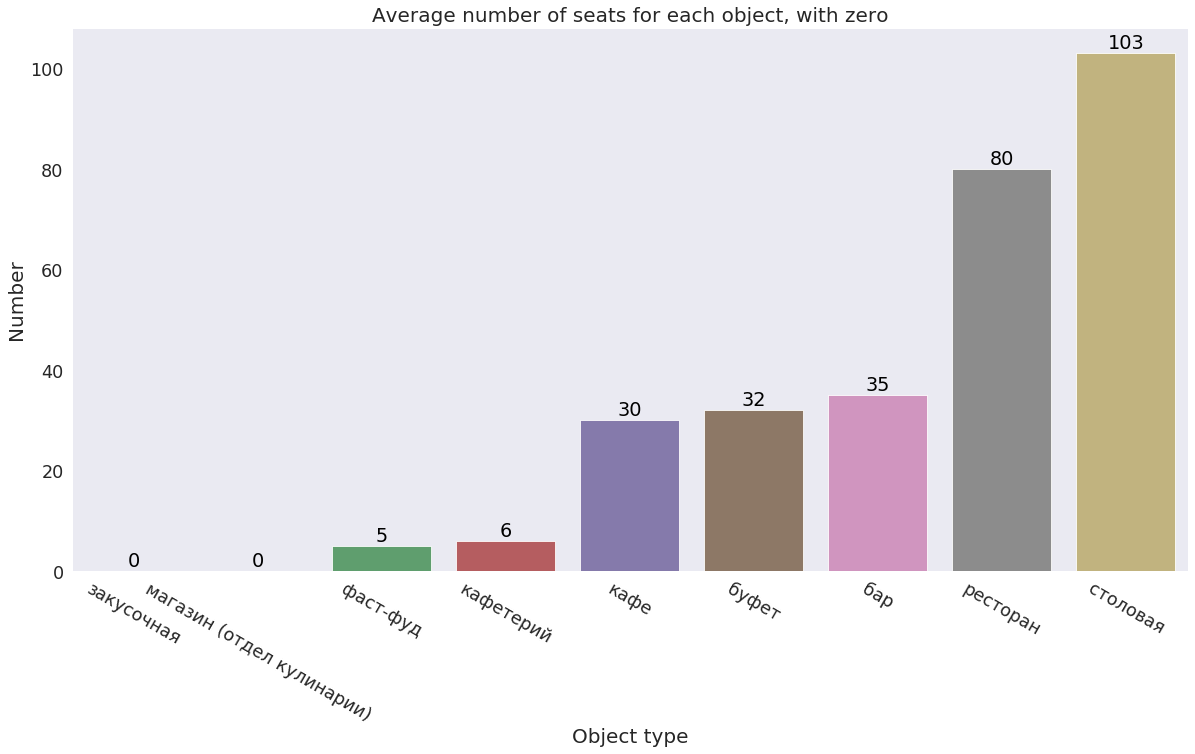

In [22]:
# формируем df с средним количеством мест на каждый объект
types_objects_by_number = rest.groupby('object_type', as_index=False)\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

# округляем и приволим к типу int
types_objects_by_number['number'] = types_objects_by_number['number'].round(0).astype('int')

print(types_objects_by_number)

# строим график
create_graph(types_objects_by_number,
             type_graph='barplot',
             x='object_type',
             y='number',
             title='Average number of seats for each object, with zero',
             xlabel='Object type',
             ylabel='Number',
             legend=False,
             dodge=True,
             hue=None,
             bias_y = 1
            )

                 object_type  number
0  магазин (отдел кулинарии)       8
1                  кафетерий       9
2                 закусочная      10
3                   фаст-фуд      20
4                        бар      35
5                       кафе      35
6                      буфет      40
7                   ресторан      80
8                   столовая     104


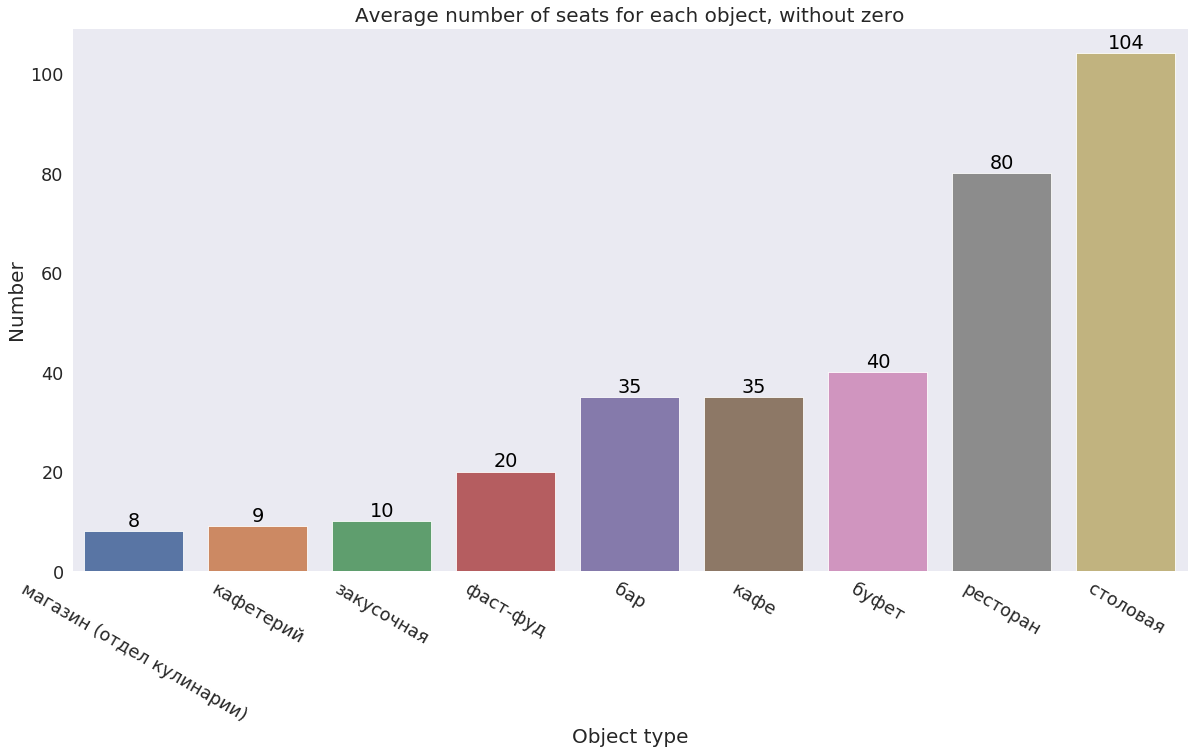

In [23]:
# убираем нулевые значения
rest_without_zero = rest[rest['number'] != 0]

# формируем df с средним количеством мест на каждый объект
types_objects_by_number_without_zero = rest_without_zero.groupby('object_type', as_index=False)\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

# округляем и приволим к типу int
types_objects_by_number_without_zero['number'] = types_objects_by_number_without_zero['number'].round(0).astype('int')

print(types_objects_by_number_without_zero)

# строим график
create_graph(types_objects_by_number_without_zero,
             type_graph='barplot',
             x='object_type',
             y='number',
             title='Average number of seats for each object, without zero',
             xlabel='Object type',
             ylabel='Number',
             legend=False,
             dodge=True,
             hue=None,
             bias_y = 1
            )

                 object_type  number
0  магазин (отдел кулинарии)       8
1                  кафетерий       9
2                 закусочная      10
3                   фаст-фуд      20
4                        бар      35
5                       кафе      35
6                      буфет      40
7                   ресторан      80
8                   столовая     104


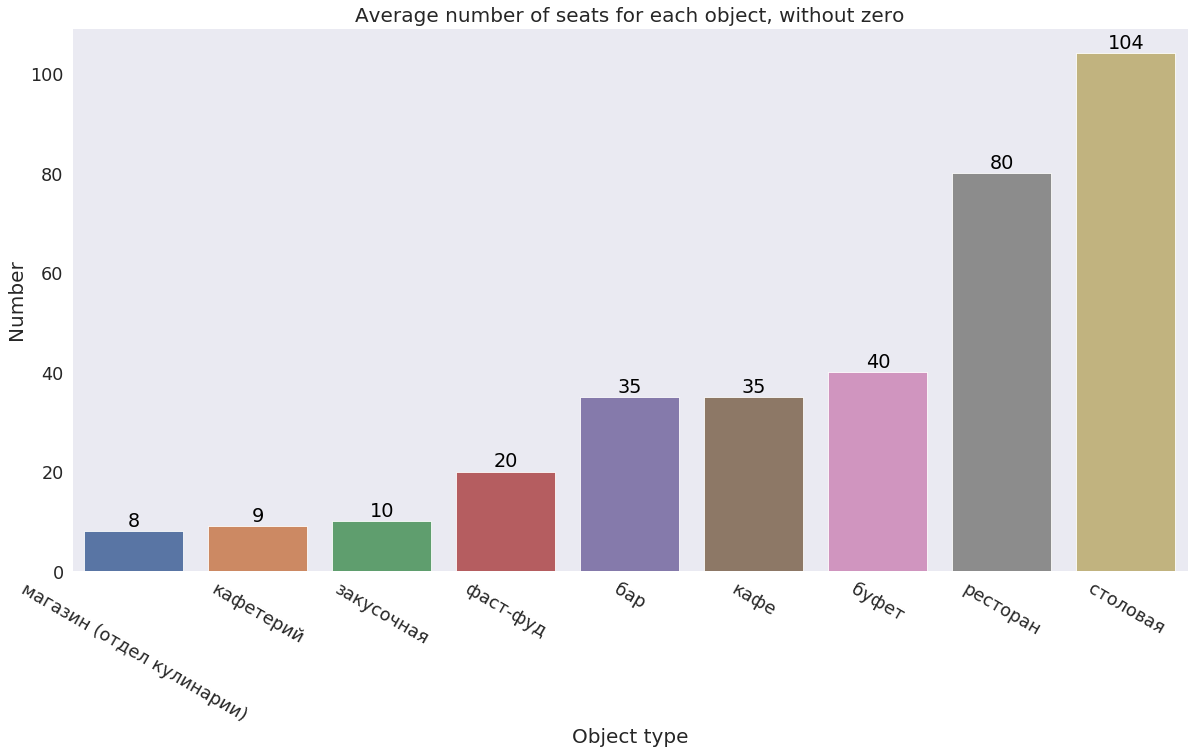

In [24]:
# формируем df с средним количеством мест на каждый объект
types_objects_by_number_without_zero = rest_without_zero.groupby('object_type', as_index=False)\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

# округляем и приволим к типу int
types_objects_by_number_without_zero['number'] = types_objects_by_number_without_zero['number'].round(0).astype('int')

print(types_objects_by_number_without_zero)

# строим график
create_graph(types_objects_by_number_without_zero,
             type_graph='barplot',
             x='object_type',
             y='number',
             title='Average number of seats for each object, without zero',
             xlabel='Object type',
             ylabel='Number',
             legend=False,
             dodge=True,
             hue=None,
             bias_y = 1
            )

**Вывод:**  

* В топ-3 вида общественного питания вошли: столовая, ресторан, буфет (с учетом заведений с нулевым количеством мест и без данных заведений)  

* Наблюдается незначительная разница в графиках видов заведений с нулевым количеством сидячих мест и заведений без нулевых сидячих мест в топ-3. Сильная разница наблюдается в видах, где не предусмотрены сидячие места, либо их количество крайне мало.

## Выделить в отдельный столбец информацию об улице из столбца address.

In [25]:
# выделяем в отдельный столбец информацию об улице из столбца address
def add_street(data):
    name_street = ['улица',
                   'бульвар',
                   'шоссе',
                   'переулок',
                   'проезд',
                   'проспект',
                   'набережная',
                   'линия',
                   'тупик',
                   'километр',
                   'аллея',
                   'площадь'
                  ]

    for street in data:
        for name in name_street:
            if name in street:
                return street

rest['street'] = rest['address'].str.split(', ').apply(add_street)

(rest['street'].isna().sum() / rest.shape[0] * 100).round(2)

2.34

In [26]:
# заполняем пропуски в столбце street
def add_region(data):
    name_region = ['посёлок',
                   'село',
                   'зеленоград',
                   'деревня',
                   'территория',
                   'просек',
                   'вблизи',
                   'квартал',
                   'микрорайон',
                   'капотня',
                   'площадь'
                  ]

    for street in data:
        for name in name_region:
            if name in street:
                return street


rest.loc[rest['street'].isna(), 'street'] = rest['address'].str.split(', ').apply(add_region)

## Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?

In [27]:
# обращаемся к внешнему df
spreadsheet_id = '1fGtfX_6otenOiCBRzt61bQe9l3gB7B8BEp-qPcWkRKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mascow_streets = pd.read_csv(BytesIO(r.content))
mascow_streets['streetname'] = mascow_streets['streetname'].str.lower()
display(mascow_streets.head())

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [28]:
# формируем df с топ улицами по количеству заведений
street_count = rest.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False)
top_10 = street_count.head(10).reset_index()
display(top_10)

# формируем df с топ округами
top_okrug = list(mascow_streets[mascow_streets['streetname'].isin(top_10.reset_index()['street'])]['okrug'].unique())
print(top_okrug)

,street,id
0,проспект мира,204
1,профсоюзная улица,183
2,ленинградский проспект,173
3,пресненская набережная,167
4,варшавское шоссе,165
5,ленинский проспект,148
6,проспект вернадского,132
7,город зеленоград,129
8,кутузовский проспект,114
9,каширское шоссе,112


['ЦАО', 'ЗАО', 'Зеленоград', 'САО', 'СВАО', 'ЮАО', 'ЮЗАО']


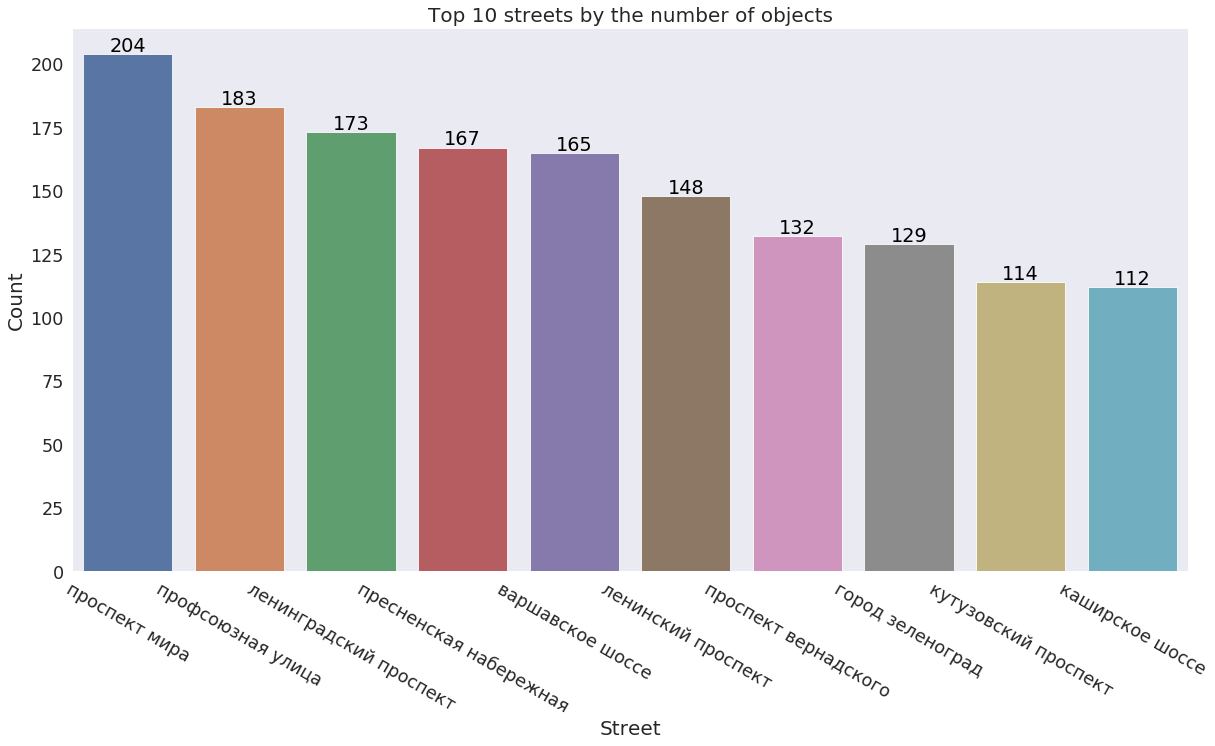

In [29]:
# строим график
create_graph(top_10,
             type_graph='barplot',
             x='street',
             y='id',
             title='Top 10 streets by the number of objects',
             xlabel='Street',
             ylabel='Count',
             legend=False,
             dodge=False,
             hue=None,
             bias_y = 1
            )

In [30]:
# формируем df с округами в которые входят топ улицы
streets_area_top_10 = top_10.merge(mascow_streets, how='left', left_on='street', right_on='streetname')
streets_area_top_10_group = pd.pivot_table(streets_area_top_10,
                                             index=['street', 'area']
                                            )
del streets_area_top_10_group['areaid']
del streets_area_top_10_group['id']

streets_area_top_10_group

Empty DataFrame
Columns: []
Index: [(варшавское шоссе, Донской район), (варшавское шоссе, Нагорный район), (варшавское шоссе, Район Нагатино-Садовники), (варшавское шоссе, Район Северное Бутово), (варшавское шоссе, Район Чертаново Северное), (варшавское шоссе, Район Чертаново Центральное), (варшавское шоссе, Район Чертаново Южное), (варшавское шоссе, Район Южное Бутово), (город зеленоград, Панфиловский район), (город зеленоград, Район Крюково), (город зеленоград, Район Матушкино-Савелки), (каширское шоссе, Район Москворечье-Сабурово), (каширское шоссе, Район Нагатино-Садовники), (каширское шоссе, Район Орехово-Борисово Северное), (каширское шоссе, Район Орехово-Борисово Южное), (кутузовский проспект, Район Дорогомилово), (кутузовский проспект, Район Фили-Давыдково), (ленинградский проспект, Район Аэропорт), (ленинградский проспект, Район Беговой), (ленинградский проспект, Район Сокол), (ленинградский проспект, Хорошевский район), (ленинский проспект, Донской район), (ленинский проспект, Ломоносовский район), (ленинский проспект, Обручевский район), (ленинский проспект, Район Гагаринский), (ленинский проспект, Район Проспект Вернадского), (ленинский проспект, Район Теплый Стан), (ленинский проспект, Район Тропарево-Никулино), (ленинский проспект, Район Якиманка), (пресненская набережная, Пресненский район), (проспект вернадского, Ломоносовский район), (проспект вернадского, Район Гагаринский), (проспект вернадского, Район Проспект Вернадского), (проспект вернадского, Район Раменки), (проспект вернадского, Район Тропарево-Никулино), (проспект мира, Алексеевский район), (проспект мира, Мещанский район), (проспект мира, Останкинский район), (проспект мира, Район Марьина роща), (проспект мира, Район Ростокино), (проспект мира, Район Свиблово), (проспект мира, Ярославский Район), (профсоюзная улица, Академический район), (профсоюзная улица, Обручевский район), (профсоюзная улица, Район Коньково), (профсоюзная улица, Район Теплый Стан), (профсоюзная улица, Район Черемушки), (профсоюзная улица, Район Ясенево)]

## Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?

In [31]:
# формируем df с единичными заведениями на одну улицу
street_count_with_one_object = street_count[street_count['id'] == 1]

print(len(street_count_with_one_object))
print(street_count_with_one_object)

593
                                         id
street                                     
улица линии октябрьской железной дороги   1
архангельский переулок                    1
астрадамский проезд                       1
улица лапина                              1
44-й километр                             1
...                                      ..
деревня бунчиха                           1
деревня бабенки                           1
улица 9 мая                               1
улица авиаконструктора микояна            1
яхромская улица                           1

[593 rows x 1 columns]


In [32]:
# формируем df с округами в которые входят улицы с единственным заведением
streets_area_with_one_object = street_count_with_one_object.merge(mascow_streets,
                                                                  how='left',
                                                                  left_on='street',
                                                                  right_on='streetname').dropna()
display(streets_area_with_one_object)

# формируем df с округами для улиц с единственным заведением
non_top_okrug = list(streets_area_with_one_object['okrug'].unique())

print(non_top_okrug)

# формируем округа в которые не входят топ улиц с заведениями
for i in top_okrug:
    non_top_okrug.remove(i)
        
print(non_top_okrug)

,id,streetname,areaid,okrug,area
0,1,улица линии октябрьской железной дороги,67.00,САО,Тимирязевский Район
1,1,архангельский переулок,13.00,ЦАО,Басманный район
2,1,астрадамский проезд,67.00,САО,Тимирязевский Район
3,1,улица лапина,114.00,ЮВАО,Район Лефортово
5,1,улица лефортовский вал,114.00,ЮВАО,Район Лефортово
...,...,...,...,...,...
628,1,денежный переулок,12.00,ЦАО,Район Арбат
629,1,денежный переулок,20.00,ЦАО,Район Хамовники
636,1,улица 9 мая,33.00,ВАО,Район Восточный
637,1,улица авиаконструктора микояна,69.00,САО,Хорошевский район


['САО', 'ЦАО', 'ЮВАО', 'СЗАО', 'ВАО', 'ЗАО', 'СВАО', 'ЮАО', 'Зеленоград', 'ЮЗАО']
['ЮВАО', 'СЗАО', 'ВАО']


In [33]:
streets_area_with_one_object_group = pd.pivot_table(streets_area_with_one_object,
                                             index=['streetname', 'area']
                                            )

del streets_area_with_one_object_group['areaid']
del streets_area_with_one_object_group['id']

display(streets_area_with_one_object_group)

print(streets_area_with_one_object_group.reset_index()['streetname'].nunique())

Empty DataFrame
Columns: []
Index: [(1-й балтийский переулок, Район Аэропорт), (1-й басманный переулок, Басманный район), (1-й басманный переулок, Красносельский район), (1-й ботанический проезд, Район Свиблово), (1-й вешняковский проезд, Рязанский район), (1-й голутвинский переулок, Район Якиманка), (1-й зачатьевский переулок, Район Хамовники), (1-й кирпичный переулок, Район Соколиная Гора), (1-й кожевнический переулок, Даниловский район), (1-й кожуховский проезд, Даниловский район), (1-й коптельский переулок, Красносельский район), (1-й коптельский переулок, Мещанский район), (1-й котельнический переулок, Таганский район), (1-й краснокурсантский проезд, Район Лефортово), (1-й курьяновский проезд, Район Печатники), (1-й лучевой просек, Район Сокольники), (1-й люсиновский переулок, Район Замоскворечье), (1-й магистральный тупик, Хорошевский район), (1-й монетчиковский переулок, Район Замоскворечье), (1-й николощеповский переулок, Район Арбат), (1-й новокузнецкий переулок, Район Замоскворечье), (1-й обыденский переулок, Район Хамовники), (1-й проезд марьиной рощи, Район Марьина роща), (1-й рижский переулок, Алексеевский район), (1-й саратовский проезд, Район Текстильщики), (1-й сельскохозяйственный проезд, Район Ростокино), (1-й сетуньский проезд, Район Раменки), (1-й силикатный проезд, Район Хорошево-Мневники), (1-й спасоналивковский переулок, Район Якиманка), (1-й тушинский проезд, Район Покровское-Стрешнево), (1-я аэропортовская улица, Район Аэропорт), (1-я боевская улица, Район Сокольники), (1-я гражданская улица, Район Богородское), (1-я карачаровская улица, Нижегородский район), (1-я линия хорошёвского серебряного бора, Район Хорошево-Мневники), (1-я миусская улица, Тверской район), (1-я напрудная улица, Лосиноостровский район), (1-я пугачёвская улица, Район Преображенское), (1-я чоботовская аллея, Район Ново-Переделкино), (11-я парковая улица, Район Восточное Измайлово), (11-я парковая улица, Район Измайлово), (11-я парковая улица, Район Северное Измайлово), (12-й проезд марьиной рощи, Район Марьина роща), (14-я парковая улица, Район Восточное Измайлово), (17-й проезд марьиной рощи, Район Марьина роща), (2-й балтийский переулок, Район Аэропорт), (2-й боткинский проезд, Район Беговой), (2-й верхний михайловский проезд, Донской район), (2-й вышеславцев переулок, Район Марьина роща), (2-й иртышский проезд, Район Гольяново), (2-й кабельный проезд, Район Лефортово), (2-й кадашёвский переулок, Район Якиманка), (2-й колобовский переулок, Тверской район), (2-й красносельский переулок, Красносельский район), (2-й курьяновский проезд, Район Печатники), (2-й лучевой просек, Район Сокольники), (2-й магистральный тупик, Хорошевский район), (2-й неопалимовский переулок, Район Хамовники), (2-й новокузнецкий переулок, Район Замоскворечье), (2-й новоподмосковный переулок, Войковский Район), (2-й обыденский переулок, Район Хамовники), (2-й полевой переулок, Район Сокольники), (2-й рощинский проезд, Донской район), (2-й сельскохозяйственный проезд, Район Ростокино), (2-й сетуньский проезд, Район Раменки), (2-й стрелецкий проезд, Район Марьина роща), (2-й хуторской переулок, Савеловский район), (2-й щемиловский переулок, Тверской район), (2-я гражданская улица, Район Богородское), (2-я дубровская улица, Таганский район), (2-я квесисская улица, Савеловский район), (2-я напрудная улица, Лосиноостровский район), (2-я прядильная улица, Район Измайлово), (2-я сокольническая улица, Район Сокольники), (2-я улица бухвостова, Район Преображенское), (2-я улица марьиной рощи, Район Марьина роща), (2-я улица энтузиастов, Район Перово), (2-я филёвская улица, Район Филевский Парк), (2-я ямская улица, Район Марьина роща), (3-й дорожный проезд, Район Чертаново Южное), (3-й кадашёвский переулок, Район Якиманка), (3-й кожуховский проезд, Южнопортовый Район), (3-й лихачёвский переулок, Головинский район), (3-й лучевой просек, Район Сокольники), (3-й павловский переулок, Даниловский район), (3-й проезд подбельского, Район Богородское), (3-й стрелецкий проезд, 

521


## Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [34]:
# формируем df с количеством посадочных мест в заведениях из топ улиц
distribution_number_seats = rest[rest['street'].isin(streets_area_top_10_group.reset_index()['street'].drop_duplicates())]
distribution_number_seats.head()

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,True,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,True,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,False,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,False,фаст-фуд,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,False,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе


<Figure size 1440x720 with 0 Axes>

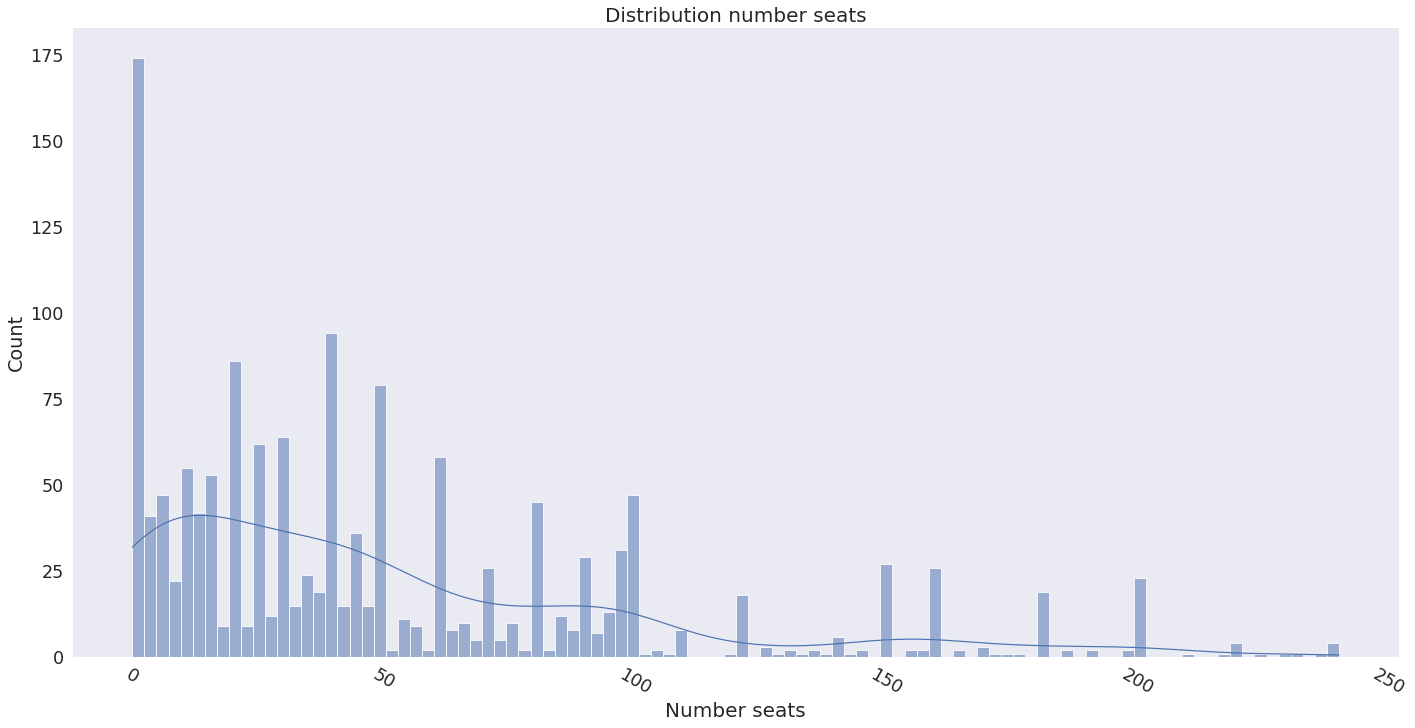

In [35]:
# строим график
create_graph(distribution_number_seats[distribution_number_seats['number'] < 250],
             type_graph='displot',
             title='Distribution number seats',
             xlabel='Number seats',
             legend=False,
             x='number'
            )

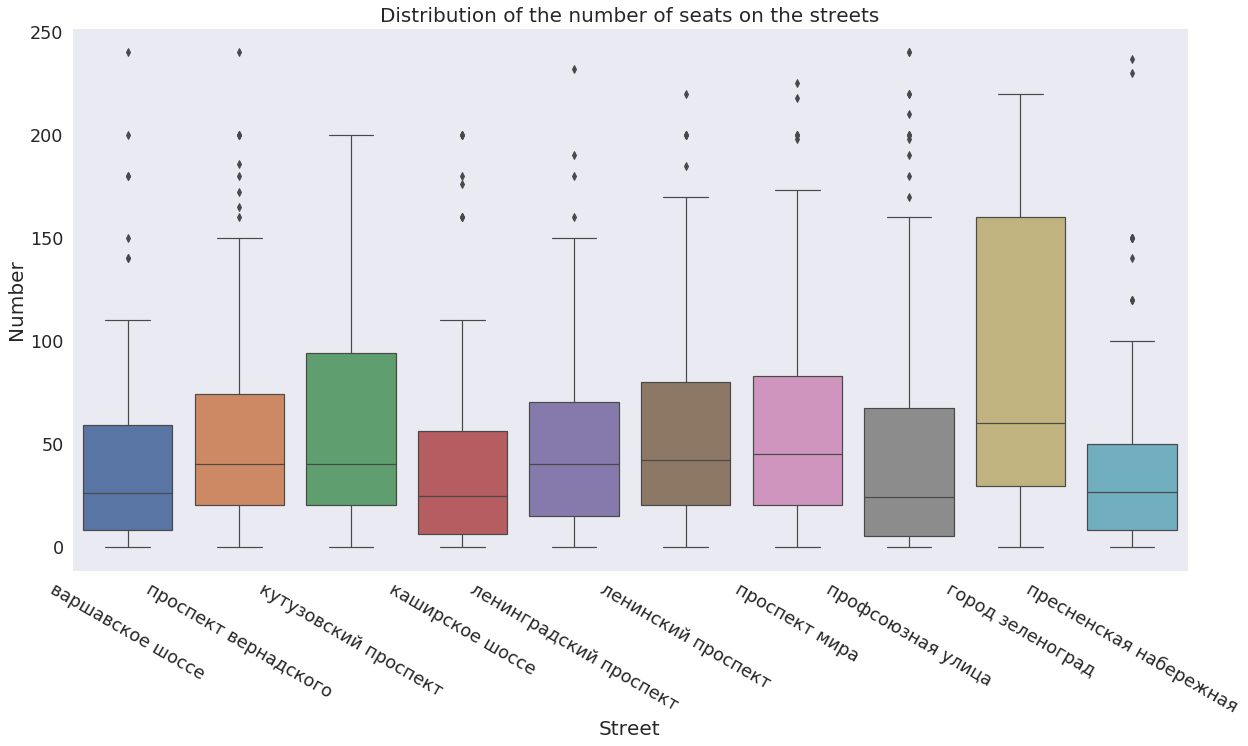

In [36]:
# строим график
create_graph(distribution_number_seats[distribution_number_seats['number'] < 250],
             type_graph='boxplot',
             x='street',
             y='number',
             title='Distribution of the number of seats on the streets',
             xlabel='Street',
             ylabel='Number',
             legend=False,
             dodge=False,
             hue=None
            )

**Вывод:**  

В большинстве здаведений до 50 - 60 посадочных мест

## Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.

**Общий вывод:**  

* Самое распространённое заведение - кафе. Далее Столовая, ресторан, фаст-фуд
* Доля сетевых заведений небольшая - 24%. Характерно сетевое распространение в основном для Фаст-фуда. Для большинства сетевых заведений так же характерно небольшое количество посадочных мест.
* В среднем наибольшее количество мест предоставляет столовая - 130. Ресторан - 97. Буфет - 51.
* Большинство заведений располагаются на следующих улицах: варшавское шоссе, город зеленоград, каширское шоссе, кутузовский проспект, ленинградский проспект, ленинский проспект, пресненская набережная, проспект вернадского, проспект вернадского, проспект мира, профсоюзная улица
* Количество единичных заведений расположенных на одну улицу - 521.
* Оптимальное количество посадочных мест 20 - 30.

**Рекомендации:**  

* Наиболее перспективным заведением будет фаст-фуд с оптимальным количеством мест 20-30
* У заведений фаст-фуд наибольшая вероятность перерасти в сеть
* Наиболее перспективные места - это округа ЮВАО, СЗАО, ВАО. В данных округах практически отсутствуют заведения общественного питания (минимальная конкуренция).

**Презентация:** https://yadi.sk/i/SQp5PxfnR8xRiw